# EDA

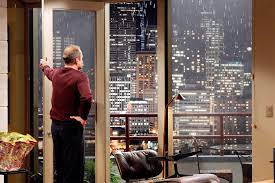

In [2]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)


!pip install plotly
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
# import missingno
import missingno as msno
from datetime import datetime
import math
import seaborn as sns
!pip install -U kaleido


  Using cached kaleido-0.2.1-py2.py3-none-manylinux1_x86_64.whl (79.9 MB)


In [3]:
pwd

'/workspace/EDA'

# Zachary Brooks,	Seller (for a seller the status is not a first person perspective asset, 
#                            its a third, a tool to improve sales)
###  -Invests in historical houses, 
### - best neighborhoods, 
### - high profits, 
### - best timing within a year, should renovate?


# HIPOTHESYS

 ## 1. As suggests Snoop Dogg in The Sandbox, very valuable houses create Hubs of Status and impact the neighbour price.
 
 ## 2. The higher profits may be in the borders with houses on even better conditions by half the price.

 ## 3. If the timing is one year, better to find a house with good grades, close to a centroid and in very good condition.

In [4]:
data= pd.read_csv('eda.csv')

In [5]:
df= data.copy()

In [31]:
df.head()

sales_id        date    house_id      price          id  bedrooms  \
0         1  2014-10-13  7129300520 221900.000  7129300520     3.000   
1         2  2014-12-09  6414100192 538000.000  6414100192     3.000   
2         3  2015-02-25  5631500400 180000.000  5631500400     2.000   
3         4  2014-12-09  2487200875 604000.000  2487200875     4.000   
4         5  2015-02-18  1954400510 510000.000  1954400510     3.000   

   bathrooms  sqft_living  sqft_lot  floors  ...  grade  sqft_above  \
0      1.000     1180.000  5650.000   1.000  ...      7    1180.000   
1      2.250     2570.000  7242.000   2.000  ...      7    2170.000   
2      1.000      770.000 10000.000   1.000  ...      6     770.000   
3      3.000     1960.000  5000.000   1.000  ...      7    1050.000   
4      2.000     1680.000  8080.000   1.000  ...      8    1680.000   

   sqft_basement  yr_built  yr_renovated  zipcode    lat     long  \
0          0.000      1955         0.000    98178 47.511 -122.257   
1        400.000      1951     19910.000    98125 47.721 -122.319   
2          0.000      1933           NaN    98028 47.738 -122.233   
3        910.000      1965         0.000    98136 47.521 -122.393   
4          0.000      1987         0.000    98074 47.617 -122.045   

   sqft_living15  sqft_lot15  
0       1340.000    5650.000  
1       1690.000    7639.000  
2       2720.000    8062.000  
3       1360.000    5000.000  
4       1800.000    7503.000  

[5 rows x 23 columns]

<Axes: >

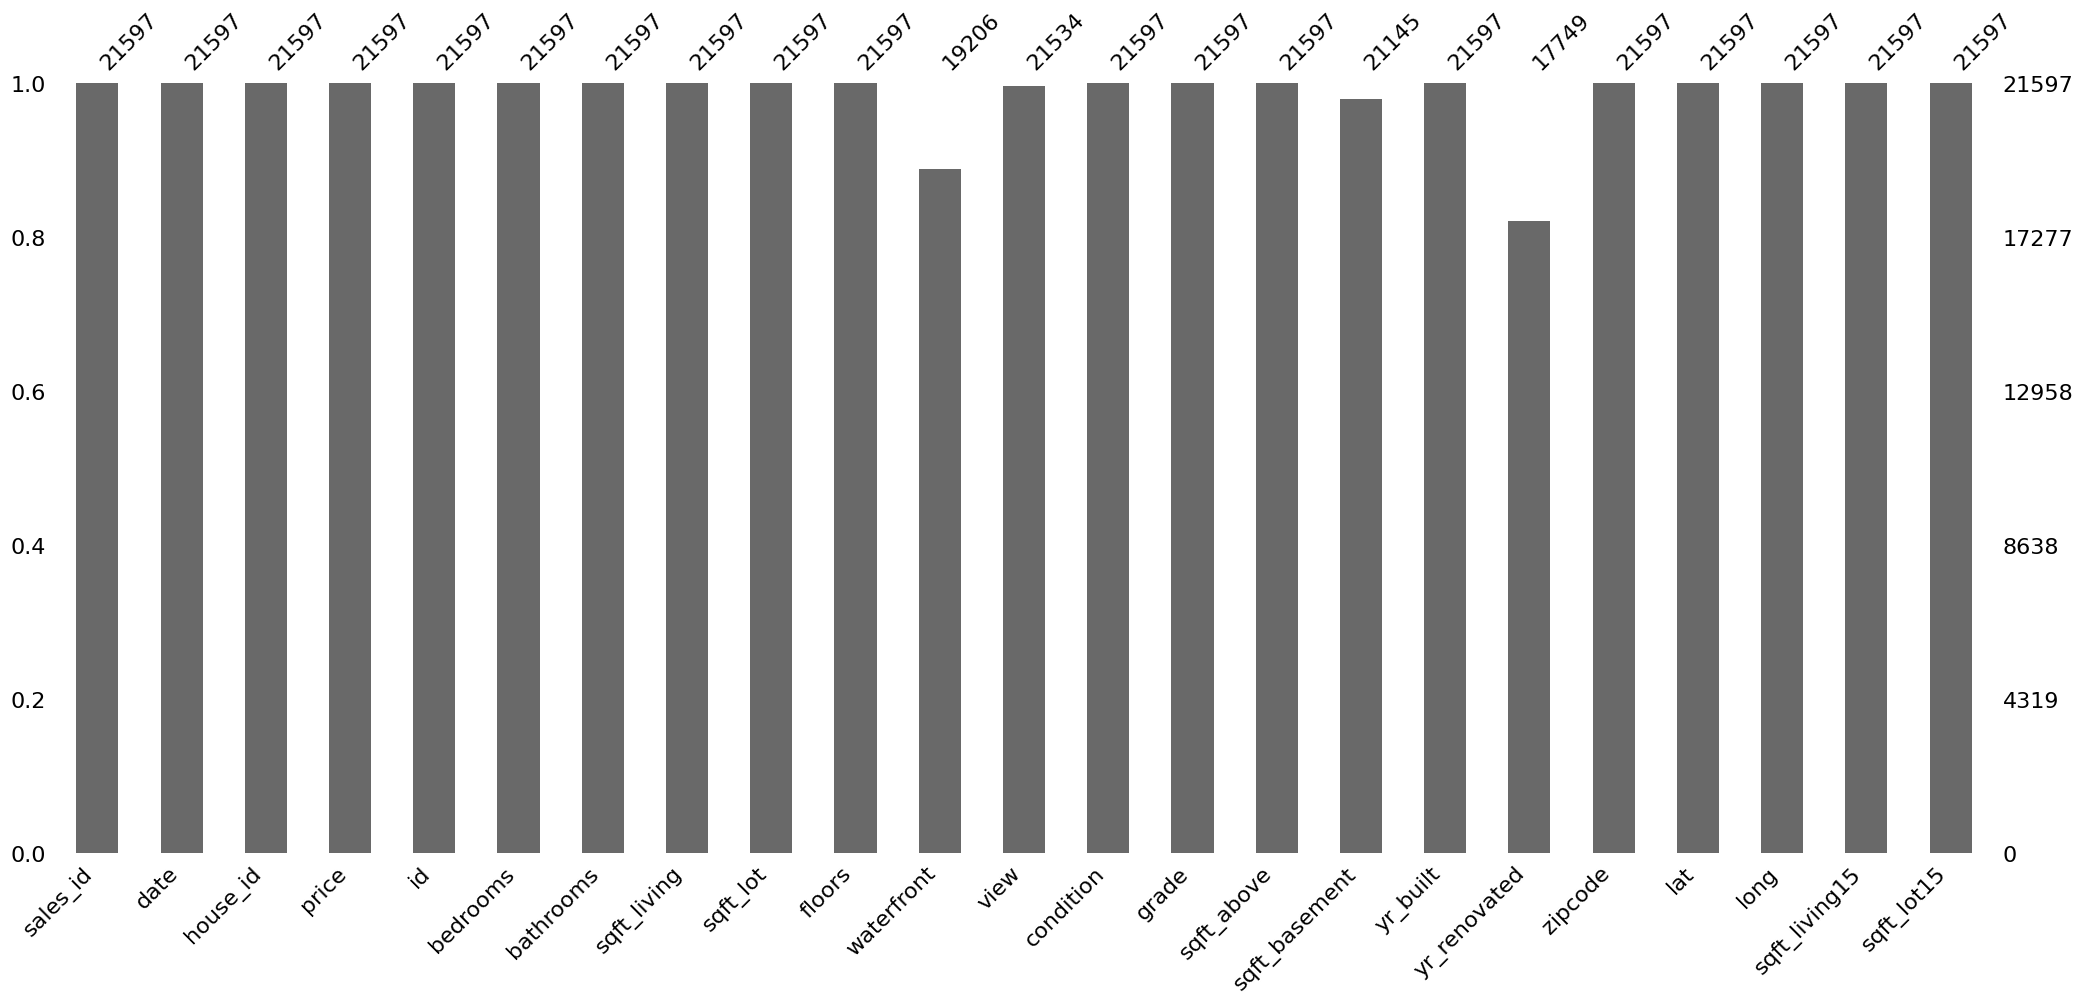

In [32]:
msno.bar(df)

In [25]:
data.isna().sum()

sales_id            0
date                0
house_id            0
price               0
id                  0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2391
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     452
yr_built            0
yr_renovated     3848
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

# FINDING CENTROID

In [6]:
df_sorted = df.sort_values("grade", ascending=False)
df_sorted.head(5)

sales_id        date    house_id       price          id  bedrooms  \
9245       9246  2014-09-19  9208900037 6890000.000  9208900037     6.000   
6035       6036  2014-11-20  1725059316 2390000.000  1725059316     4.000   
13398     13399  2015-01-30  2426039123 2420000.000  2426039123     5.000   
4407       4408  2014-08-04  2470100110 5570000.000  2470100110     5.000   
10362     10363  2014-12-12  3303850390 2980000.000  3303850390     5.000   

       bathrooms  sqft_living  sqft_lot  floors  ...  grade  sqft_above  \
9245       7.750     9890.000 31374.000   2.000  ...     13    8860.000   
6035       4.000     6330.000 13296.000   2.000  ...     13    4900.000   
13398      4.750     7880.000 24250.000   2.000  ...     13    7880.000   
4407       5.750     9200.000 35069.000   2.000  ...     13    6200.000   
10362      5.500     7400.000 18898.000   2.000  ...     13    6290.000   

       sqft_basement  yr_built  yr_renovated  zipcode    lat     long  \
9245        1030.000      2001         0.000    98039 47.630 -122.240   
6035        1430.000      2000         0.000    98033 47.649 -122.201   
13398          0.000      1996         0.000    98177 47.733 -122.362   
4407        3000.000      2001           NaN    98039 47.629 -122.233   
10362       1110.000      2001         0.000    98006 47.543 -122.112   

       sqft_living15  sqft_lot15  
9245        4540.000   42730.000  
6035        2200.000    9196.000  
13398       2740.000   10761.000  
4407        3560.000   24345.000  
10362       6110.000   26442.000  

[5 rows x 23 columns]

In [8]:
# Calculate the number of rows corresponding to the top 10% of grades
top_20_percent = round(0.20 * len(df_sorted))

top_20_percent

4319

In [23]:
cut=round(0.2* len(df))
df_sorted_cuted = df_sorted.head(cut)
len( df_sorted_cuted)

4319

In [11]:
 df_sorted_cuted.columns

Index(['sales_id', 'date', 'house_id', 'price', 'id', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [91]:
fig = px.scatter_mapbox(
                        df_sorted,
                        lat='lat',
                        lon="long",
                        opacity =0.5,
                        zoom = 8,
                        mapbox_style='open-street-map',
                        color='price',
                        size='price', 
                        hover_name='id',
                        hover_data={'zipcode':True,
                                    'grade':True,
                                    'condition':True,
                                    'yr_built': True
                                    },
                        #template = 'plotly_dark'
)



fig.update_layout(
    width=1200,
    height=900,
    title_font_size=28,
    margin=dict(l=0, r=0, t=100, b=0),  # Increase top margin
    title={
        'text': "<b> All houses in King County. Price represented in Color and Size </b>",  # Bold title
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)





In [90]:
!pip install chart_studio.plotly

ERROR: Could not find a version that satisfies the requirement chart_studio.plotly (from versions: none)
ERROR: No matching distribution found for chart_studio.plotly


In [92]:


# Assuming df_sorted is your DataFrame
# Dark blue color scale with reduced variance
dark_blue_scale = [
    [0, 'rgb(70, 130, 180)'],    # Steel blue
    [0.4, 'rgb(0, 0, 205)'],     # Medium blue
    [0.6, 'rgb(0, 0, 139)'],     # Dark blue
    [0.8, 'rgb(25, 25, 112)'],   # Midnight blue
    [1, 'rgb(0, 0, 70)']         # Very dark blue
]

# Create the scatter mapbox plot
fig = px.scatter_mapbox(
    df_sorted_cuted,
    lat='lat',
    lon="long",
    opacity=0.8,
    zoom=8,
    mapbox_style='open-street-map',
    color='price',
    size='price', 
    color_continuous_scale=dark_blue_scale,
    hover_name='id',
    hover_data={'zipcode': True, 'grade': True, 'condition': True, 'yr_built': True}
)

# Update layout properties
fig.update_layout(
    width=1200,
    height=900,
    title_font_size=28,
    margin=dict(l=0, r=0, t=100, b=0),
    title={
        'text': "<b>Top 20 % price houses in King County</b>",
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)

fig.show()


fig.write_image("output_plot_20_percent.png", engine="kaleido", scale=5)


In [15]:
pip install -U kaleido

Note: you may need to restart the kernel to use updated packages.


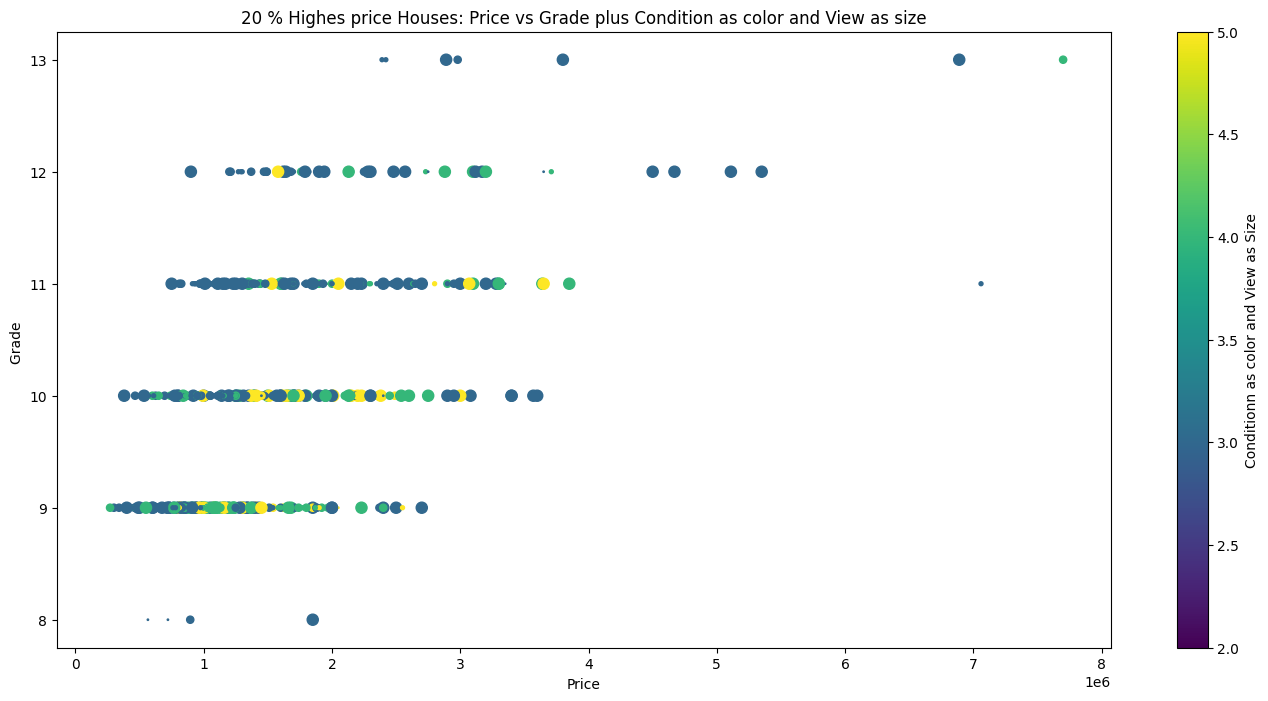

In [27]:


#sqr_list_grade = [round(math.sqrt(x),2) for x in df_top_05.grade.tolist()]
#sqr_list_condition = [round(math.sqrt(x),2) for x in df_top_05.condition.tolist()]

#grade_condition = np.array(sqr_list_condition) + np.array(sqr_list_grade)
plt.figure(figsize=(17, 8))
# Scatter plot
plt.scatter(df_sorted_cuted.price, df_sorted_cuted.grade, c=df_sorted_cuted.condition, cmap='viridis', s = df_sorted_cuted.view**3   )

# Adding labels and title
plt.xlabel('Price')
plt.ylabel('Grade ')
plt.title('20 % Highes price Houses: Price vs Grade plus Condition as color and View as size')

# Show the colorbar
plt.colorbar(label='Conditionn as color and View as Size')

# Show the plot
plt.show()


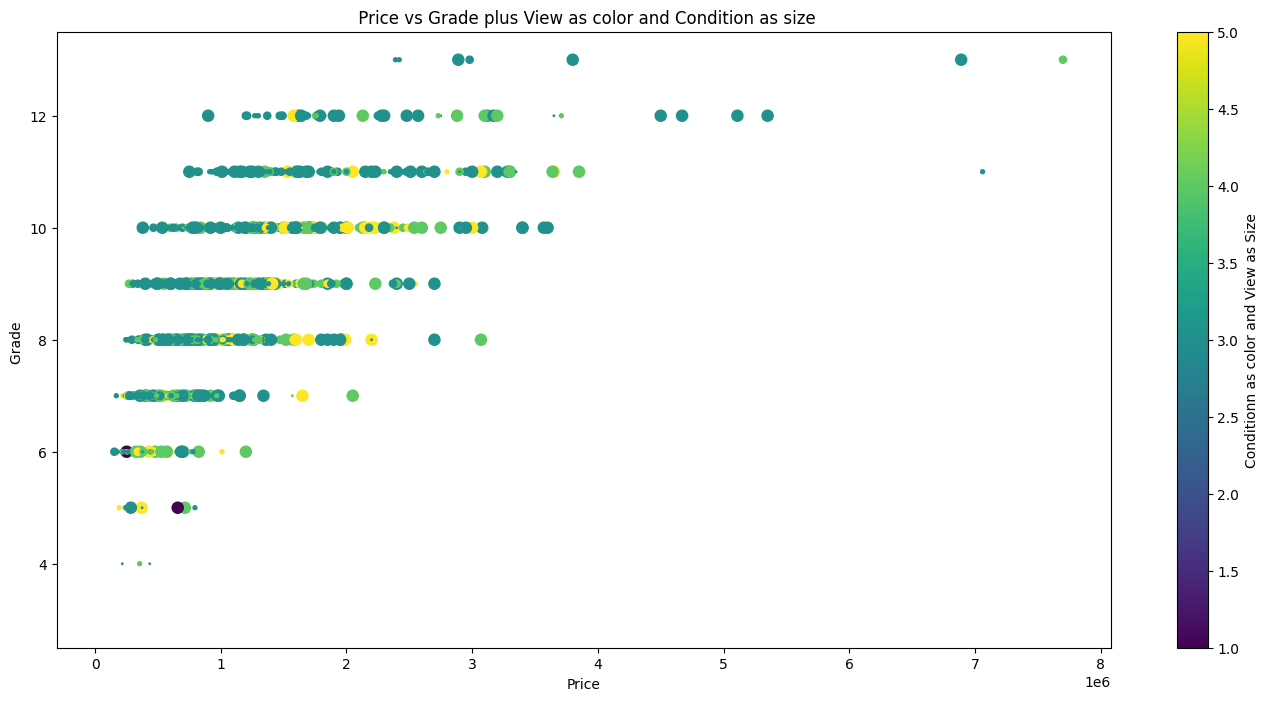

In [93]:


#sqr_list_grade = [round(math.sqrt(x),2) for x in df_top_05.grade.tolist()]
#sqr_list_condition = [round(math.sqrt(x),2) for x in df_top_05.condition.tolist()]

#grade_condition = np.array(sqr_list_condition) + np.array(sqr_list_grade)
plt.figure(figsize=(17, 8))
# Scatter plot
plt.scatter(df.price, df.grade, c=df.condition, cmap='viridis', s = df.view**3   )

# Adding labels and title
plt.xlabel('Price')
plt.ylabel('Grade ')
plt.title(' Price vs Grade plus View as color and Condition as size')

# Show the colorbar
plt.colorbar(label='Conditionn as color and View as Size')

# Show the plot
plt.show()

In [83]:
df.grade.unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13])

In [61]:
selected_data = df[(df['grade'] >= 11) & (df['price'].between(900000, 4000000)) & (df['view'] >= 2.5) & (df['yr_built'] <= 1940) ][['lat', 'long']]
selected_data

lat     long
1833  47.650 -122.370
3582  47.592 -122.388
4214  47.670 -122.416
6502  47.651 -122.277
15244 47.630 -122.362
17966 47.565 -122.210

In [50]:
df[(df['grade'] >= 11) & (df['price'].between(1000000, 3500000)) & (df['view'] >= 2.5) & (df['yr_built'] <= 1940) ][['price', 'yr_built']]

price  yr_built
1833  1530000.000      1927
3582  1600000.000      1910
4214  1880000.000      1925
15244 3070000.000      1909
17966 2030000.000      1934

In [95]:
df_top_10=df_sorted_cuted.copy()

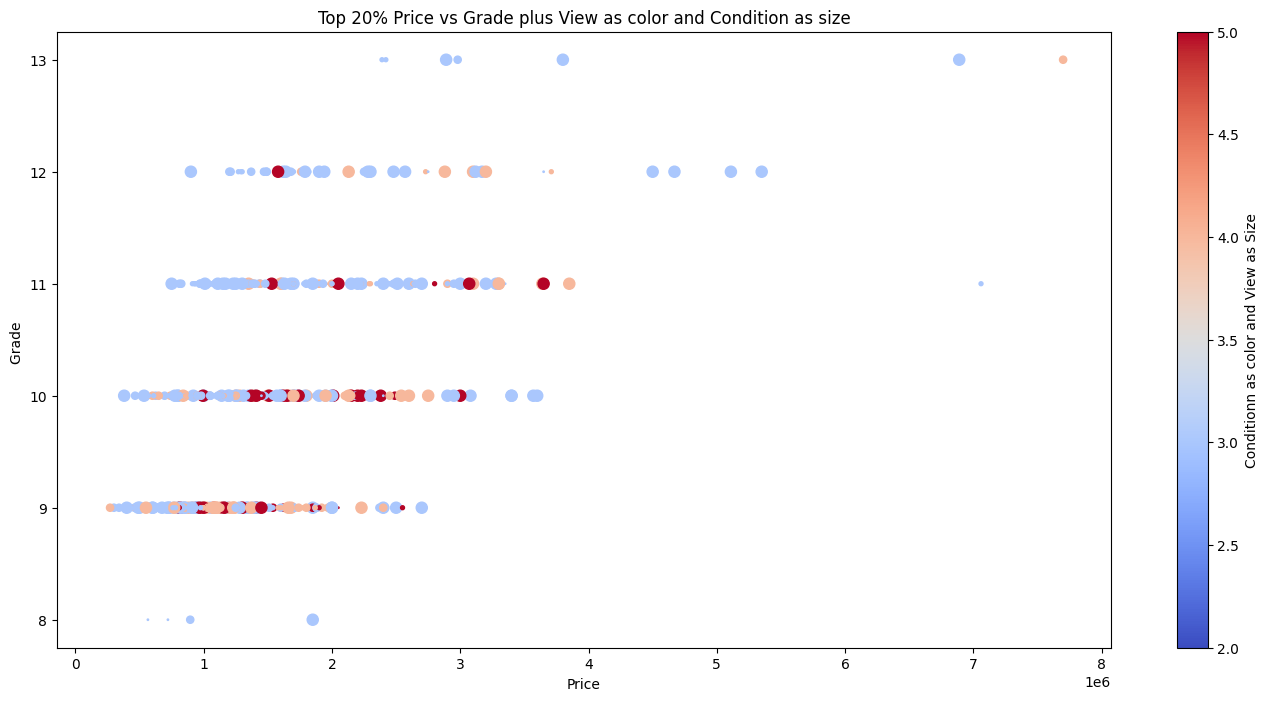

In [96]:
#sqr_list_grade = [round(math.sqrt(x),2) for x in df_top_05.grade.tolist()]
#sqr_list_condition = [round(math.sqrt(x),2) for x in df_top_05.condition.tolist()]

#grade_condition = np.array(sqr_list_condition) + np.array(sqr_list_grade)
plt.figure(figsize=(17, 8))
# Scatter plot
plt.scatter(df_top_10.price, df_top_10.grade, c=df_top_10.condition, cmap='coolwarm', s = df_top_10.view**3   )

# Adding labels and title
plt.xlabel('Price')
plt.ylabel('Grade ')
plt.title('Top 20% Price vs Grade plus View as color and Condition as size')

# Show the colorbar
plt.colorbar(label='Conditionn as color and View as Size')

# Show the plot
plt.show()


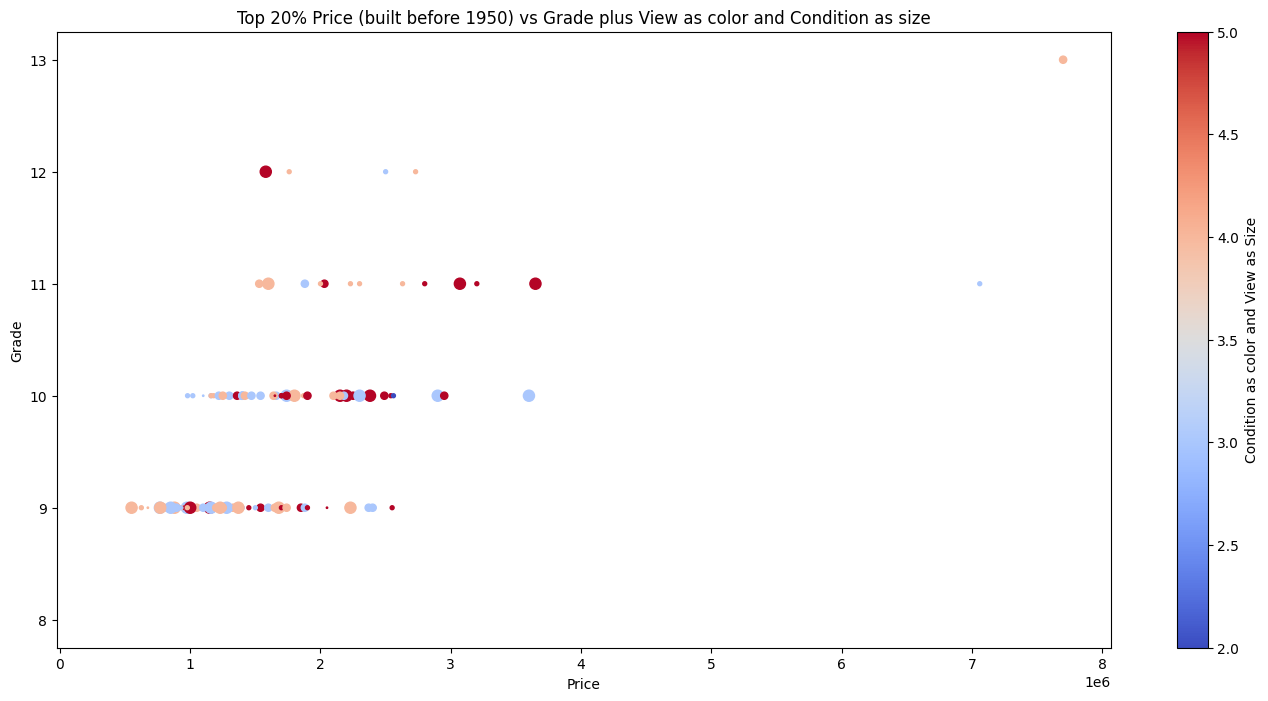

In [97]:
filtered_df = df_top_10[df_top_10['yr_built'] < 1950]

plt.figure(figsize=(17, 8))
plt.scatter(filtered_df.price, filtered_df.grade, c=filtered_df.condition, cmap='coolwarm', s=filtered_df.view**3)

# Adding labels and title
plt.xlabel('Price')
plt.ylabel('Grade')
plt.title('Top 20% Price (built before 1950) vs Grade plus View as color and Condition as size')

# Show the colorbar
plt.colorbar(label='Condition as color and View as Size')

# Show the plot
plt.show()

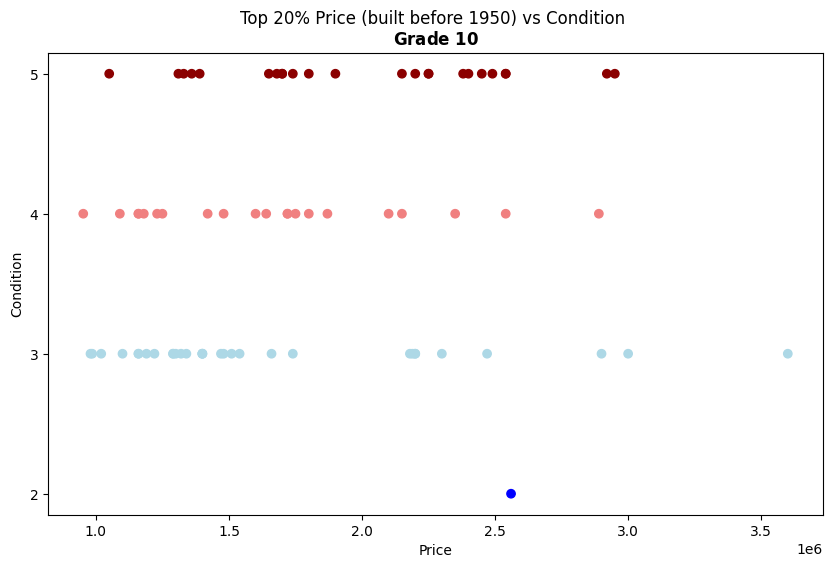

In [102]:


# Assuming df_top_10 is your DataFrame
filtered_df = df_top_10[(df_top_10['yr_built'] < 1950) & (df_top_10['grade'] == 10)]

# Scatter plot with custom colors for conditions 2, 3, and 4
colors = np.where(filtered_df['condition'] == 2, 'blue', np.where(filtered_df['condition'] == 3, 'lightblue', np.where(filtered_df['condition'] == 4, 'lightcoral', 'darkred')))

plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['price'], filtered_df['condition'], marker='o', c=colors)

# Adding labels and title
plt.xlabel('Price')
plt.ylabel('Condition')
plt.title('Top 20% Price (built before 1950) vs Condition \n'
          r'$\bf{Grade\ 10}$')

# Set y-axis ticks to include only integer values
plt.yticks(range(int(filtered_df['condition'].min()), int(filtered_df['condition'].max()) + 1))

# Remove the color bar
plt.colorbar().remove()

# Show the plot
plt.show()





In [132]:
prices_11_grade_4_5 =df_top_10[(df_top_10['grade'] >= 11) & (df_top_10['condition'].between(4, 5)) & (df_top_10['yr_built'] <= 1940) ]['price']
prices_11_grade_3_4 =df_top_10[(df_top_10['grade'] >= 11) & (df_top_10['condition'].between(3, 4)) & (df_top_10['yr_built'] <= 1940) ]['price']
prices_11_grade_2_3 =df_top_10[(df_top_10['grade'] >= 11) & (df_top_10['condition'].between(2, 3)) & (df_top_10['yr_built'] <= 1940) ]['price']
prices_11_grade_1_2 =df_top_10[(df_top_10['grade'] >= 11) & (df_top_10['condition'].between(1, 2)) & (df_top_10['yr_built'] <= 1940) ]['price']

In [98]:
prices_11_grade =df_top_10[(df_top_10['grade'] >= 11)  & (df_top_10['yr_built'] <= 1940) & (4 <df_top_10['condition'] <= 5 )][['price']]

prices_10_grade =df_top_10[(df_top_10['grade'] >= 10)  & (df_top_10['yr_built'] <= 1940) ][['price']]

prices_9_grade =df_top_10[(df_top_10['grade'] >= 9)  & (df_top_10['yr_built'] <= 1940) ][['price']]

In [248]:
print(list1)
print(list2)
print(list3)


[3200000.0, 1930000.0, 3000000.0, 2300000.0, 3070000.0, 2140000.0, 2400000.0, 2030000.0, 2800000.0, 1600000.0, 1530000.0, 2630000.0, 2230000.0, 2500000.0, 1500000.0, 3650000.0, 2000000.0]
[1930000.0, 3000000.0, 2300000.0, 2140000.0, 2400000.0, 1600000.0, 1530000.0, 2630000.0, 2230000.0, 2500000.0, 1500000.0, 2000000.0]
[3200000.0, 3070000.0, 2030000.0, 2800000.0, 3650000.0]


In [247]:

list1 =df_top_10[(df_top_10['grade'] == 11) & (df_top_10['condition'].between(4, 5)) & (df_top_10['yr_built'] <= 1940) ]['price'].tolist()

In [45]:
import plotly.express as px

# Assuming df_sorted_cuted is your DataFrame
filtered_df = df_sorted_cuted[(df_sorted_cuted['grade'] == 10) & (df_sorted_cuted['yr_built'] < 1950) & (df_sorted_cuted['condition'] >= 3)]

# Include condition 10
filtered_df_condition_10 = df_sorted_cuted[(df_sorted_cuted['grade'] == 10) & (df_sorted_cuted['yr_built'] < 1950) & (df_sorted_cuted['condition'] == 10)]

# Concatenate the DataFrames
filtered_df = pd.concat([filtered_df, filtered_df_condition_10])

fig = px.scatter_mapbox(
    filtered_df,
    lat='lat',
    lon='long',
    opacity=0.5,
    zoom=8,
    mapbox_style='open-street-map',
    color='price',
    size='price',  # Set size to the 'price' column
    hover_name='id',
    hover_data={'zipcode': True, 'grade': True, 'condition': True, 'yr_built': True},
    color_continuous_scale=[
        (0.1, 'purple'),
        (0.5, 'red'),
        (1, 'darkred')
    ],
)

# Updating height, width, margins, and other layout properties
fig.update_layout(
    width=1200,
    height=900,
    title_font_size=28,
    margin=dict(l=0, r=0, t=60, b=0),  # Set margins to zero (pixels)
    title={
        'text': "Houses in King County with Grade 10, Yr_built < 1950, Condition >= 3 (including Condition 10)",
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)

fig.show()


In [109]:
import plotly.express as px

# Assuming df_sorted_cuted is your DataFrame
filtered_df = df_sorted_cuted[(df_sorted_cuted['grade'].isin([9, 10, 11])) & 
                              (df_sorted_cuted['yr_built'] < 1950) & 
                              (df_sorted_cuted['condition'] >= 3)]

fig = px.scatter_mapbox(
    filtered_df,
    lat='lat',
    lon='long',
    opacity=0.5,
    zoom=8,
    mapbox_style='open-street-map',
    color='price',
    size='price',  # Set size to the 'price' column
    hover_name='id',
    hover_data={'zipcode': True, 'grade': True, 'condition': True, 'yr_built': True, 'sales_id': True},
    color_continuous_scale=[
        (0.1, 'purple'),
        (0.5, 'red'),
        (1, 'darkred')
    ],
)

# Updating height, width, margins, and other layout properties
fig.update_layout(
    width=1200,
    height=900,
    title_font_size=28,
    margin=dict(l=0, r=0, t=100, b=0),  # Set margins to zero (pixels)
    title={
        'text': "<b> House prices with Grade 9, 10 and 11, built before 1950, Condition >= 3 <b>",
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)

fig.show()


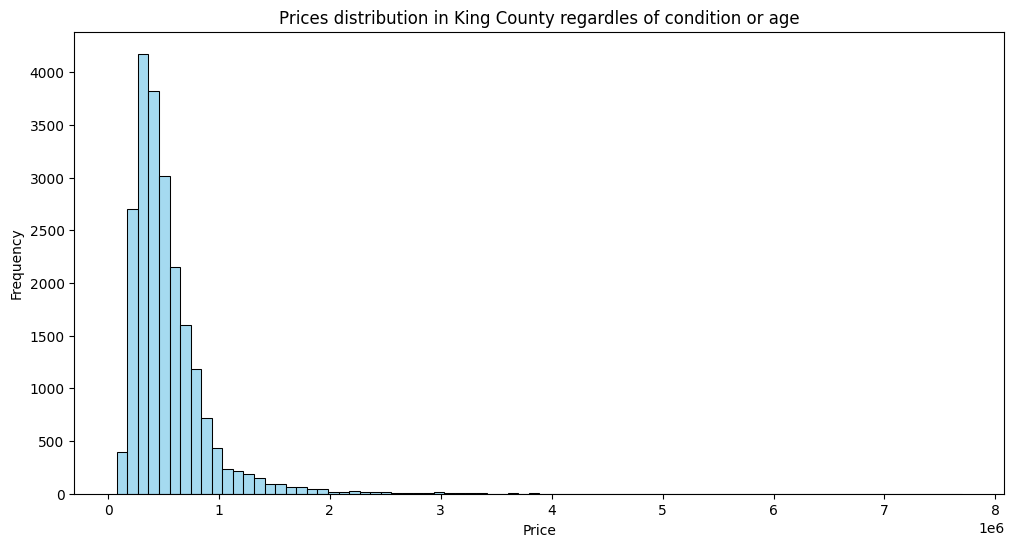

In [114]:

# Assuming df_sorted_cuted is your DataFrame
plt.figure(figsize=(12, 6))
sns.histplot(df_sorted['price'], bins=80, color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Prices distribution in King County regardles of condition or age')

# Show the plot
plt.show()


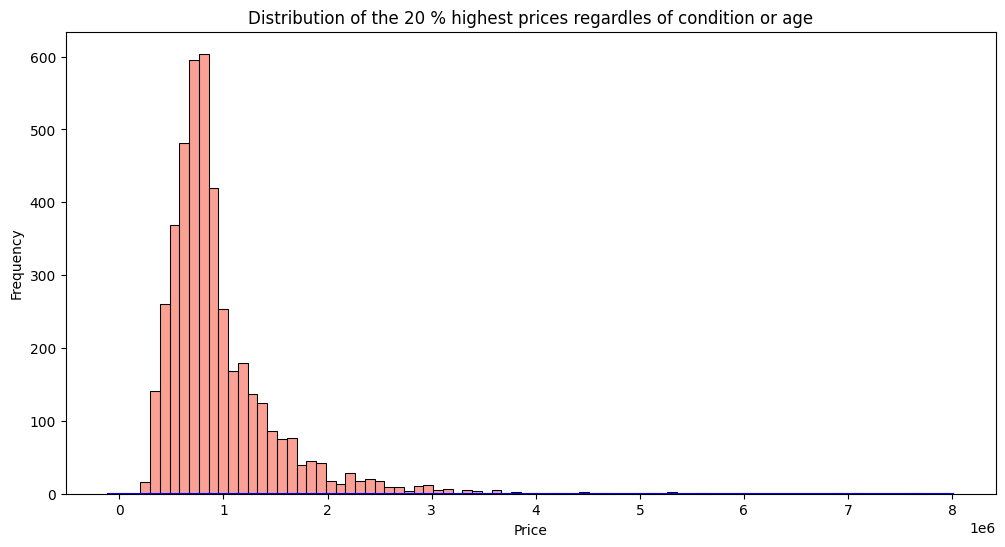

In [128]:
# Assuming df_sorted_cuted is your DataFrame
plt.figure(figsize=(12, 6))

# Plot the histogram with custom colors
sns.histplot(df_sorted_cuted['price'], bins=80, color='salmon', edgecolor='black')

# Plot KDE line in blue
sns.kdeplot(df_sorted_cuted['price'], color='blue')

# Adding labels and title
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of the 20 % highest prices regardles of condition or age')

# Show the plot
plt.show()


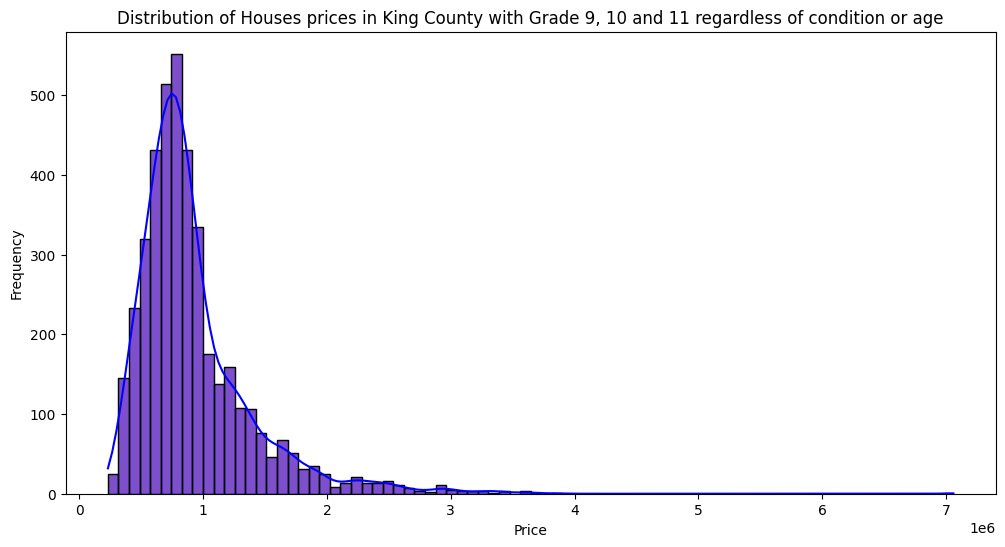

In [105]:
# Assuming df_sorted_cuted is your DataFrame
filtered_plot = df_sorted_cuted[df_sorted_cuted['grade'].isin([9, 10, 11])]

plt.figure(figsize=(12, 6))

# Plot the histogram with custom colors
sns.histplot(filtered_plot['price'], bins=80, color='salmon', edgecolor='black')

# Plot KDE line in blue
sns.histplot(filtered_plot['price'], bins=80, kde=True, color='blue', linewidth=1)

# Adding labels and title
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Houses prices in King County with Grade 9, 10 and 11 regardless of condition or age')

# Show the plot
plt.show()


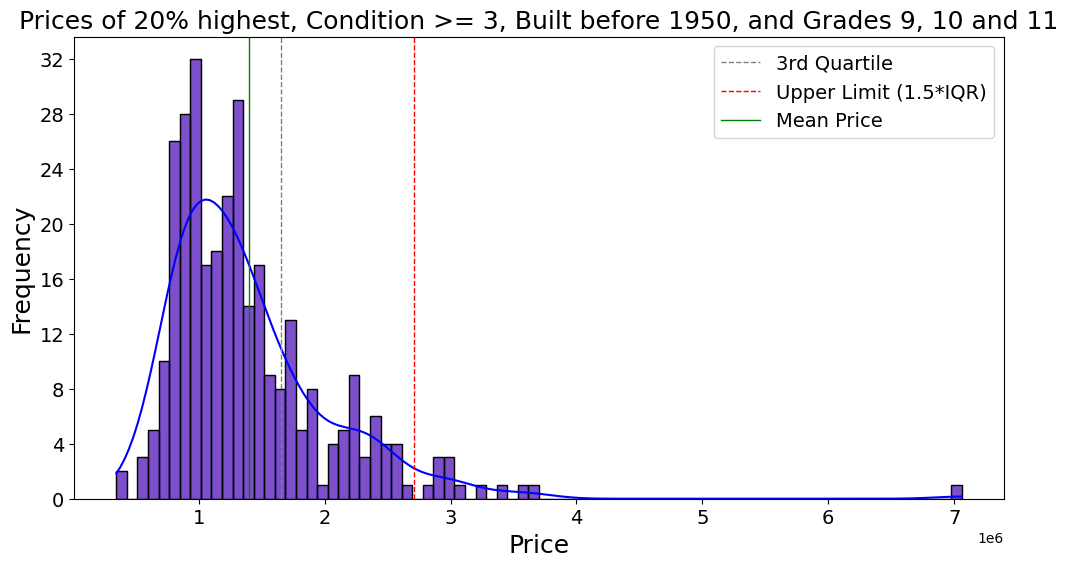

In [131]:
# Assuming df_sorted_cuted is your DataFrame
plt.figure(figsize=(12, 6))

# Update the filtering condition for filtered_df
filtered_df = df_sorted_cuted[(df_sorted_cuted['condition'] >= 3) & 
                               (df_sorted_cuted['yr_built'] < 1950) &
                               (df_sorted_cuted['grade'].isin([9, 10, 11]))]

# Plot the histogram with custom colors
sns.histplot(filtered_df['price'], bins=80, color='salmon', edgecolor='black')

# Plot KDE line in blue
sns.histplot(filtered_df['price'], bins=80, kde=True, color='blue', linewidth=1)

# Calculate the mean price
mean_price = filtered_df['price'].mean()

# Calculate the 3rd quartile and interquartile range (IQR)
third_quartile = filtered_df['price'].quantile(0.75)
first_quartile = filtered_df['price'].quantile(0.25)
iqr = third_quartile - first_quartile

# Calculate the upper limit for outliers
upper_limit = third_quartile + 1.5 * iqr

# Add grey dashed vertical lines for the 3rd quartile and upper limit
plt.axvline(x=third_quartile, color='grey', linestyle='dashed', linewidth=1, label='3rd Quartile')
plt.axvline(x=upper_limit, color='red', linestyle='dashed', linewidth=1, label='Upper Limit (1.5*IQR)')

# Add a solid green vertical line for the mean price
plt.axvline(x=mean_price, color='green', linestyle='solid', linewidth=1, label='Mean Price')

# Set font sizes
xlabel_fontsize = 18
ylabel_fontsize = 18
title_fontsize = 18
legend_fontsize = 14  # Adjust this value as needed
legend_fontsize = 14  # Adjust this value as needed
axis_ticks_fontsize = 14  # Font size for axis ticks

plt.xlabel('Price', fontsize=xlabel_fontsize)
plt.ylabel('Frequency', fontsize=ylabel_fontsize)
plt.title('Prices of 20% highest, Condition >= 3, Built before 1950, and Grades 9, 10 and 11', fontsize=title_fontsize)

# Set y-axis ticks to include only integer values at intervals of 2
plt.yticks(range(int(plt.ylim()[0]), int(plt.ylim()[1]) + 1, 4))

# Adjust font size for x-axis and y-axis tick labels
plt.tick_params(axis='x', labelsize=axis_ticks_fontsize)
plt.tick_params(axis='y', labelsize=axis_ticks_fontsize)

# Show the plot with adjusted legend font size
plt.legend(fontsize=legend_fontsize)
plt.show()



In [137]:
import plotly.express as px

# Assuming df_sorted_cuted is your DataFrame
filtered_df = df_sorted_cuted[(df_sorted_cuted['grade'].isin([9, 10, 11])) & 
                              (df_sorted_cuted['yr_built'] < 1950) & 
                              (df_sorted_cuted['condition'] >= 3) & 
                              (df_sorted_cuted['price'] > 2750000)]

fig = px.scatter_mapbox(
    filtered_df,
    lat='lat',
    lon='long',
    opacity=0.5,
    zoom=8,
    mapbox_style='open-street-map',
    color='price',
    size='price',  # Set size to the 'price' column
    hover_name='id',
    hover_data={'zipcode': True, 'grade': True, 'condition': True, 'yr_built': True},
    color_continuous_scale=[
        (0.1, 'purple'),
        (0.5, 'red'),
        (1, 'darkred')
    ],
)

# Updating height, width, margins, and other layout properties
fig.update_layout(
    width=1200,
    height=900,
    title_font_size=28,
    margin=dict(l=0, r=0, t=100, b=0),  # Set margins to zero (pixels)
    title={
        'text': "<b> 20% highest, Grade 9, 10 and 11, built before < 1950, Condition >= 3, Price > 2750000 <b>",
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)

fig.show()


ValueError: Value of 'color' is not the name of a column in 'data_frame'. Expected one of ['sales_id', 'date', 'house_id', 'price', 'id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'] but received: red

In [145]:
import plotly.express as px

# Assuming df_sorted_cuted is your DataFrame
filtered_df = df_sorted_cuted[(df_sorted_cuted['grade'].isin([9, 10, 11])) & 
                              (df_sorted_cuted['yr_built'] < 1950) & 
                              (df_sorted_cuted['condition'] >= 3) & 
                              (df_sorted_cuted['price'] > 2750000)]

# Add a new column with a constant value for color
filtered_df['color'] = 'red'

fig = px.scatter_mapbox(
    filtered_df,
    lat='lat',
    lon='long',
    opacity=0.8,  # Set opacity to 1.0 for no transparency
    zoom=8,
    mapbox_style='open-street-map',
    color='color',  # Set color to the new 'color' column
    size='price',   # Set size to the 'price' column
    hover_name='id',
    hover_data={'zipcode': True, 'grade': True, 'condition': True, 'yr_built': True},
    color_discrete_map={'centroids': 'red'}  # Set color to red
)

# Updating height, width, margins, and other layout properties
fig.update_layout(
    width=1200,
    height=900,
    title_font_size=28,
    margin=dict(l=0, r=0, t=100, b=0),  # Set margins to zero (pixels)
    title={
        'text': "<b> 20% highest, Grade 9, 10 and 11, built before < 1950, Condition >= 3, Price > 2750000 <b>",
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)

fig.show()



In [147]:
# Assuming df_sorted_cuted is your DataFrame
data1 = {
    11609: [4215, 13268, 16575, 14187, 10500, 10368, 13333, 2817, 1582, 19547, 10167, 8323, 16012, 5291, 2454, 4754, 16791, 15139, 9671, 10959, 15025, 10958, 3223, 4657, 4312, 16314, 16158, 18354, 19453, 3477, 16609, 3900, 935, 17315, 14343, 14390, 1359, 14228, 13581, 17500, 823, 17708, 17665, 13775, 11588, 2656, 6072, 2515, 11704], 
    7185: [17388, 6460, 16281, 13621, 18062, 14996, 3255, 9470, 4455, 5156, 19419, 3496, 10254, 15603, 14293, 13413, 17352, 17383, 7807, 14913, 6010, 11794, 11913, 11716], 
    6503: [16831, 16539, 17082, 3766, 8898, 10101, 9650, 19188, 13282, 2135, 6299], 
    2863: [9406, 4029, 14948, 11684, 3516, 1675, 9121, 7121, 16876, 2983, 3064, 5392, 16335, 18765, 18702, 16252, 4753, 10020, 8373, 9651, 19174, 9702, 9984, 12516, 12506, 17157, 6507, 6908, 17588, 13561, 11394, 2780, 1934, 14450], 
    15245: [15540, 3583, 1834, 18395, 12188, 16601, 313, 16931, 10848, 2982, 2827, 15141, 9620, 9187, 5613, 3861, 5743, 19262, 15780, 4247, 86, 17547, 12842, 497, 13747, 640, 2240, 2366, 16976, 2465], 
    14018: [16707, 14084, 15654, 6190, 19258, 1816, 5698, 7646, 3382, 1986, 1943, 15345, 11563, 3732, 18617, 3151, 3405, 2919, 5384, 16351, 17227, 12645, 14001, 6451, 17164, 1705, 14243, 13479, 6765, 6778, 14959, 11844], 
    10436: [1944, 14173, 3858, 5665, 18362, 6004, 3008, 10626, 9600, 4856, 9658, 3928, 9869, 944, 11759], 
    6397: [17967, 16881, 8776, 7880, 4632, 18195, 19039, 18388, 3894, 14274, 13346, 13271, 2073, 1831, 11833], 
    18542: [1432, 8146, 19054, 18868, 4208, 15036, 3102, 4677, 18589, 15911, 18661, 18701, 18814, 19532, 10423, 4186, 19256, 9628, 4033, 13958, 1049, 7354, 7159, 739, 473, 7734, 11505, 14700, 11477, 14910, 6104, 11204], 
    11964: [18754, 3336, 7277, 13944, 10488, 3101, 18941, 8992, 4874, 9848, 14120, 11994, 328, 101, 13824, 12693, 519, 17636, 14828, 14576], 
    3911: [1769, 8852, 3547, 13406, 2107, 14558], 
    18315: [8216, 780, 7337, 15167, 8062, 5859, 11007, 19119, 18521, 4444, 9168, 8796, 3850, 15822, 3921, 15666, 16569, 1216, 12022, 1349, 1327, 13586, 283, 13244, 2083, 2428, 16938], 
    2898: [15191, 3254, 5585, 18497, 13663, 13223, 12701, 11206]
}

condition_filter = (df_sorted_cuted['grade'].isin([9, 10,11])) & \
                   (df_sorted_cuted['yr_built'] < 1950) & \
                   (df_sorted_cuted['condition'] >= 3)

filtered_df_above = df_sorted_cuted[condition_filter & (df_sorted_cuted['price'] > 2750000)]
filtered_df_below = df_sorted_cuted[condition_filter & (df_sorted_cuted['price'] <= 2750000)]

# Add a new column with a constant value for color
filtered_df_above['color'] = 'centroid'
filtered_df_below['color'] = 'satellite'

fig = px.scatter_mapbox(
    pd.concat([filtered_df_above, filtered_df_below]),
    lat='lat',
    lon='long',
    opacity=0.5,  # Set opacity for all spheres
    zoom=8,
    mapbox_style='open-street-map',
    color='color',  # Set color to the new 'color' column
    size='price',   # Set size to the 'price' column
    hover_name='id',
    hover_data={'zipcode': True, 'grade': True, 'condition': True, 'yr_built': True, 'sales_id': True},
    color_discrete_map={'centroid': 'red', 'satellite': 'blue'}  # Set color to red and blue
)

# Updating height, width, margins, and other layout properties
fig.update_layout(
    width=1200,
    height=900,
    title_font_size=28,
    margin=dict(l=0, r=0, t=100, b=0),  # Set margins to zero (pixels)
    title={
        'text': "<b> 20% highest, Grade 9, 10 and 11, built < 1950, Cond. >= 3, Centroids and Satelites <b>",
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)

fig.show()

In [ ]:
data1 = {
    11609: [4215, 13268, 16575, 14187, 10500, 10368, 13333, 2817, 1582, 19547, 10167, 8323, 16012, 5291, 2454, 4754, 16791, 15139, 9671, 10959, 15025, 10958, 3223, 4657, 4312, 16314, 16158, 18354, 19453, 3477, 16609, 3900, 935, 17315, 14343, 14390, 1359, 14228, 13581, 17500, 823, 17708, 17665, 13775, 11588, 2656, 6072, 2515, 11704], 
    7185: [17388, 6460, 16281, 13621, 18062, 14996, 3255, 9470, 4455, 5156, 19419, 3496, 10254, 15603, 14293, 13413, 17352, 17383, 7807, 14913, 6010, 11794, 11913, 11716], 
    6503: [16831, 16539, 17082, 3766, 8898, 10101, 9650, 19188, 13282, 2135, 6299], 
    2863: [9406, 4029, 14948, 11684, 3516, 1675, 9121, 7121, 16876, 2983, 3064, 5392, 16335, 18765, 18702, 16252, 4753, 10020, 8373, 9651, 19174, 9702, 9984, 12516, 12506, 17157, 6507, 6908, 17588, 13561, 11394, 2780, 1934, 14450], 
    15245: [15540, 3583, 1834, 18395, 12188, 16601, 313, 16931, 10848, 2982, 2827, 15141, 9620, 9187, 5613, 3861, 5743, 19262, 15780, 4247, 86, 17547, 12842, 497, 13747, 640, 2240, 2366, 16976, 2465], 
    14018: [16707, 14084, 15654, 6190, 19258, 1816, 5698, 7646, 3382, 1986, 1943, 15345, 11563, 3732, 18617, 3151, 3405, 2919, 5384, 16351, 17227, 12645, 14001, 6451, 17164, 1705, 14243, 13479, 6765, 6778, 14959, 11844], 
    10436: [1944, 14173, 3858, 5665, 18362, 6004, 3008, 10626, 9600, 4856, 9658, 3928, 9869, 944, 11759], 
    6397: [17967, 16881, 8776, 7880, 4632, 18195, 19039, 18388, 3894, 14274, 13346, 13271, 2073, 1831, 11833], 
    18542: [1432, 8146, 19054, 18868, 4208, 15036, 3102, 4677, 18589, 15911, 18661, 18701, 18814, 19532, 10423, 4186, 19256, 9628, 4033, 13958, 1049, 7354, 7159, 739, 473, 7734, 11505, 14700, 11477, 14910, 6104, 11204], 
    11964: [18754, 3336, 7277, 13944, 10488, 3101, 18941, 8992, 4874, 9848, 14120, 11994, 328, 101, 13824, 12693, 519, 17636, 14828, 14576], 
    3911: [1769, 8852, 3547, 13406, 2107, 14558], 
    18315: [8216, 780, 7337, 15167, 8062, 5859, 11007, 19119, 18521, 4444, 9168, 8796, 3850, 15822, 3921, 15666, 16569, 1216, 12022, 1349, 1327, 13586, 283, 13244, 2083, 2428, 16938], 
    2898: [15191, 3254, 5585, 18497, 13663, 13223, 12701, 11206]
}

In [34]:
# TO FILTER AND FIT EACH CENTROID INTO A SINGLE DF
df2 = df_sorted_cuted.copy()
# Assuming df_sorted_cuted is your DataFrame
data1 = {
    11609: [4215, 13268, 16575, 14187, 10500, 10368, 13333, 2817, 1582, 19547, 10167, 8323, 16012, 5291, 2454, 4754, 16791, 15139, 9671, 10959, 15025, 10958, 3223, 4657, 4312, 16314, 16158, 18354, 19453, 3477, 16609, 3900, 935, 17315, 14343, 14390, 1359, 14228, 13581, 17500, 823, 17708, 17665, 13775, 11588, 2656, 6072, 2515, 11704], 

}


# Flatten the dictionary to get a list of sales_id including the keys
sales_ids = set(data1.keys())
for values in data1.values():
    sales_ids.update(values)

# Filter the DataFrame to keep only the rows with these sales_ids
filtered_df2 = df2[df2['sales_id'].isin(sales_ids)]

print(len(filtered_df2))
print(len(data1[11609]))

50
49


In [66]:
# TO FILTER AND FIT EACH CENTROID INTO A SINGLE DF
df2 = df_sorted_cuted.copy()
# Assuming df_sorted_cuted is your DataFrame
data1 = {
   
    6503: [16831, 16539, 17082, 3766, 8898, 10101, 9650, 19188, 13282, 2135, 6299],     
}


# Flatten the dictionary to get a list of sales_id including the keys
sales_ids = set(data1.keys())
for values in data1.values():
    sales_ids.update(values)

# Filter the DataFrame to keep only the rows with these sales_ids
filtered_df4 = df2[df2['sales_id'].isin(sales_ids)]

print(len(filtered_df4))
print(len(data1[6503]))

12
11


In [68]:
  # TO FILTER AND FIT EACH CENTROID INTO A SINGLE DF
df2 = df_sorted_cuted.copy()
# Assuming df_sorted_cuted is your DataFrame
data1 = {
   
        2863: [9406, 4029, 14948, 11684, 3516, 1675, 9121, 7121, 16876, 2983, 3064, 5392, 16335, 18765, 18702, 16252, 4753, 10020, 8373, 9651, 19174, 9702, 9984, 12516, 12506, 17157, 6507, 6908, 17588, 13561, 11394, 2780, 1934, 14450], 
   
}


# Flatten the dictionary to get a list of sales_id including the keys
sales_ids = set(data1.keys())
for values in data1.values():
    sales_ids.update(values)

# Filter the DataFrame to keep only the rows with these sales_ids
filtered_df5 = df2[df2['sales_id'].isin(sales_ids)]

print(len(filtered_df5))
print(len(data1[2863]))
  


35
34


In [71]:
  # TO FILTER AND FIT EACH CENTROID INTO A SINGLE DF
df2 = df_sorted_cuted.copy()
# Assuming df_sorted_cuted is your DataFrame
data1 = {
   
    14018: [16707, 14084, 15654, 6190, 19258, 1816, 5698, 7646, 3382, 1986, 1943, 15345, 11563, 3732, 18617, 3151, 3405, 2919, 5384, 16351, 17227, 12645, 14001, 6451, 17164, 1705, 14243, 13479, 6765, 6778, 14959, 11844], 
   
}


# Flatten the dictionary to get a list of sales_id including the keys
sales_ids = set(data1.keys())
for values in data1.values():
    sales_ids.update(values)

# Filter the DataFrame to keep only the rows with these sales_ids
filtered_df6 = df2[df2['sales_id'].isin(sales_ids)]

print(len(filtered_df6))
print(len(data1[14018]))
    
  


33
32


In [150]:
# Assuming df_sorted_cuted is your DataFrame
data1 = {
    11609: [4215, 13268, 16575, 14187, 10500, 10368, 13333, 2817, 1582, 19547, 10167, 8323, 16012, 5291, 2454, 4754, 16791, 15139, 9671, 10959, 15025, 10958, 3223, 4657, 4312, 16314, 16158, 18354, 19453, 3477, 16609, 3900, 935, 17315, 14343, 14390, 1359, 14228, 13581, 17500, 823, 17708, 17665, 13775, 11588, 2656, 6072, 2515, 11704], 

}

condition_filter = (filtered_df2['grade'].isin([9, 10,11])) & \
                   (filtered_df2['yr_built'] < 1950) & \
                   (filtered_df2['condition'] >= 3)

filtered_df_above = filtered_df2[condition_filter & (filtered_df2['price'] > 2750000)]
filtered_df_below = filtered_df2[condition_filter & (filtered_df2['price'] <= 2750000)]

# Add a new column with a constant value for color
filtered_df_above['color'] = 'centroid'
filtered_df_below['color'] = 'satellite'

fig = px.scatter_mapbox(
    pd.concat([filtered_df_above, filtered_df_below]),
    lat='lat',
    lon='long',
    opacity=0.5,  # Set opacity for all spheres
    zoom=8,
    mapbox_style='open-street-map',
    color='color',  # Set color to the new 'color' column
    size='price',   # Set size to the 'price' column
    hover_name='id',
    hover_data={'zipcode': True, 'grade': True, 'condition': True, 'yr_built': True, 'sales_id': True},
    color_discrete_map={'centroid': 'red', 'satellite': 'blue'}  # Set color to red and blue
)
fig.update_layout(
    width=1200,
    height=900,
    title_font_size=28,
    margin=dict(l=0, r=0, t=100, b=0),
    title={
        'text': "<b>Centroid 1, Magnolia: Grade 9, 10 and 11, built before 1950 and Condition >= 3</b>",
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    legend_title_font_size=19,  # Adjust this size as needed
    legend_font_size=18  # Adjust this size as needed
)

fig.show()

In [157]:

# Assuming filtered_df2 is your DataFrame
# ... (your data preparation code)

# Create the condition filters
condition_filter = (filtered_df2['grade'].isin([9, 10, 11])) & \
                   (filtered_df2['yr_built'] < 1950) & \
                   (filtered_df2['condition'] >= 3)

filtered_df_above = filtered_df2[condition_filter & (filtered_df2['price'] > 2750000)]
filtered_df_below = filtered_df2[condition_filter & (filtered_df2['price'] <= 2750000)]

# Set the color for filtered_df_above to a label 'centroid'
filtered_df_above['color'] = 'centroid'

# Set a color based on condition for filtered_df_below
filtered_df_below['color'] = 'condition-' + filtered_df_below['condition'].astype(str)

# Concatenate the dataframes
combined_df = pd.concat([filtered_df_above, filtered_df_below])

# Create a discrete color map including 'centroid' for black and other colors for conditions
unique_conditions = combined_df['color'].unique()
color_discrete_map = {'centroid': 'black'}
color_discrete_map.update({cond: px.colors.qualitative.Plotly[i]
                           for i, cond in enumerate(unique_conditions) if cond != 'centroid'})

# Create the scatter mapbox plot
fig = px.scatter_mapbox(
    combined_df,
    lat='lat',
    lon='long',
    opacity=0.8,
    zoom=8,
    mapbox_style='open-street-map',
    color='color',
    size='price',
    hover_name='id',
    hover_data={'zipcode': True, 'grade': True, 'condition': True, 'yr_built': True, 'sales_id': True},
    color_discrete_map=color_discrete_map
)

# Update layout properties
fig.update_layout(
    width=1200,
    height=900,
    title_font_size=28,
    margin=dict(l=0, r=0, t=100, b=0),
    title={
        'text': "<b>Centroid 1, Magnolia: Grade 9, 10 and 11, built before 1950 and Condition >= 3</b>",
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    legend_title_font_size=19,  # Adjust this size as needed
    legend_font_size=39  # Adjust this size as needed
)

fig.update_traces(
    hoverlabel=dict(
        font_size=19,  # Adjust the font size here
        font_family="Arial, sans-serif"  # You can change the font family if needed
    )
)

fig.show()


In [159]:

# Assuming filtered_df3 is your DataFrame
# ... (your data preparation code)

# Create the condition filters
condition_filter = (filtered_df3['grade'].isin([9, 10, 11])) & \
                   (filtered_df3['yr_built'] < 1950) & \
                   (filtered_df3['condition'] >= 3)

filtered_df_above = filtered_df3[condition_filter & (filtered_df3['price'] > 2750000)]
filtered_df_below = filtered_df3[condition_filter & (filtered_df3['price'] <= 2750000)]

# Set the color for filtered_df_above to a label 'centroid'
filtered_df_above['color'] = 'centroid'

# Set a color based on condition for filtered_df_below
filtered_df_below['color'] = 'condition-' + filtered_df_below['condition'].astype(str)

# Concatenate the dataframes
combined_df = pd.concat([filtered_df_above, filtered_df_below])

# Define the color mapping for each condition
color_mapping = {
    'condition-3': px.colors.qualitative.Plotly[0],
    'condition-4': px.colors.qualitative.Plotly[1],
    'condition-5': px.colors.qualitative.Plotly[2],
    'centroid': 'black'
}

# Create the scatter mapbox plot
fig = px.scatter_mapbox(
    combined_df,
    lat='lat',
    lon='long',
    opacity=0.7,
    zoom=8,
    mapbox_style='open-street-map',
    color='color',
    size='price',
    hover_name='id',
    hover_data={'zipcode': True, 'grade': True, 'condition': True, 'yr_built': True, 'sales_id': True},
    color_discrete_map=color_mapping
)





# Update layout properties
fig.update_layout(
    width=1200,
    height=900,
    title_font_size=28,
    margin=dict(l=0, r=0, t=100, b=0),
    title={
        'text': "<b>Centroid 2, Queen Anne: Grade 9, 10 and 11, built before 1950 and Condition >= 3<b>",
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    legend_title_font_size=19,  # Adjust this size as needed
    legend_font_size=39  # Adjust this size as needed
)

fig.update_traces(
    hoverlabel=dict(
        font_size=19,  # Adjust the font size here
        font_family="Arial, sans-serif"  # You can change the font family if needed
    )
)

fig.show()


In [164]:
# Assuming filtered_df2 is your DataFrame
# ... (your data preparation code)

# Create the condition filters
condition_filter = (filtered_df4['grade'].isin([9, 10, 11])) & \
                   (filtered_df4['yr_built'] < 1950) & \
                   (filtered_df4['condition'] >= 3)

filtered_df_above = filtered_df4[condition_filter & (filtered_df4['price'] > 2750000)]
filtered_df_below = filtered_df4[condition_filter & (filtered_df4['price'] <= 2750000)]

# Set the color for filtered_df_above to a label 'centroid'
filtered_df_above['color'] = 'centroid'

# Set a color based on condition for filtered_df_below
filtered_df_below['color'] = 'condition-' + filtered_df_below['condition'].astype(str)

# Concatenate the dataframes
combined_df = pd.concat([filtered_df_above, filtered_df_below])

# Create a discrete color map including 'centroid' for black and other colors for conditions
unique_conditions = combined_df['color'].unique()
color_discrete_map = {'centroid': 'black'}
color_discrete_map.update({cond: px.colors.qualitative.Plotly[i]
                           for i, cond in enumerate(unique_conditions) if cond != 'centroid'})

# Create the scatter mapbox plot
fig = px.scatter_mapbox(
    combined_df,
    lat='lat',
    lon='long',
    opacity=0.8,
    zoom=8,
    mapbox_style='open-street-map',
    color='color',
    size='price',
    hover_name='id',
    hover_data={'zipcode': True, 'grade': True, 'condition': True, 'yr_built': True, 'sales_id': True},
    color_discrete_map=color_discrete_map
)

# Update layout properties
fig.update_layout(
    width=1200,
    height=900,
    title_font_size=28,
    margin=dict(l=0, r=0, t=100, b=0),
    title={
        'text': "<b> Centroid 2, Webster Point: Grade 9, 10 and 11, built before 1950 and Condition >= 3 <b> ",
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    legend_title_font_size=19,  # Adjust this size as needed
    legend_font_size=39  # Adjust this size as needed
)

fig.update_traces(
    hoverlabel=dict(
        font_size=19,  # Adjust the font size here
        font_family="Arial, sans-serif"  # You can change the font family if needed
    )
)

fig.show()


In [169]:
# Assuming filtered_df2 is your DataFrame
# ... (your data preparation code)

# Create the condition filters
condition_filter = (filtered_df5['grade'].isin([9, 10, 11])) & \
                   (filtered_df5['yr_built'] < 1950) & \
                   (filtered_df5['condition'] >= 3)

filtered_df_above = filtered_df5[condition_filter & (filtered_df5['price'] > 2750000)]
filtered_df_below = filtered_df5[condition_filter & (filtered_df5['price'] <= 2750000)]

# Set the color for filtered_df_above to a label 'centroid'
filtered_df_above['color'] = 'centroid'

# Set a color based on condition for filtered_df_below
filtered_df_below['color'] = 'condition-' + filtered_df_below['condition'].astype(str)

# Concatenate the dataframes
combined_df = pd.concat([filtered_df_above, filtered_df_below])

# Create a discrete color map including 'centroid' for black and other colors for conditions
unique_conditions = combined_df['color'].unique()
color_discrete_map = {'centroid': 'black'}
color_discrete_map.update({cond: px.colors.qualitative.Plotly[i]
                           for i, cond in enumerate(unique_conditions) if cond != 'centroid'})

# Create the scatter mapbox plot
fig = px.scatter_mapbox(
    combined_df,
    lat='lat',
    lon='long',
    opacity=0.8,
    zoom=8,
    mapbox_style='open-street-map',
    color='color',
    size='price',
    hover_name='id',
    hover_data={'zipcode': True, 'grade': True, 'condition': True, 'yr_built': True, 'sales_id': True},
    color_discrete_map=color_discrete_map
)


# Update layout properties
fig.update_layout(
    width=1200,
    height=900,
    title_font_size=28,
    margin=dict(l=0, r=0, t=100, b=0),
    title={
          'text': "<b> Cent.3, Homer Hadley M. Bridge: Grade 9, 10 and 11 built before 1950, Condition >= 3 <b> ",
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    legend_title_font_size=19,  # Adjust this size as needed
    legend_font_size=39  # Adjust this size as needed
)

fig.update_traces(
    hoverlabel=dict(
        font_size=19,  # Adjust the font size here
        font_family="Arial, sans-serif"  # You can change the font family if needed
    )
)

fig.show()


In [170]:
# Assuming filtered_df2 is your DataFrame
# ... (your data preparation code)

# Create the condition filters
condition_filter = (filtered_df6['grade'].isin([9, 10, 11])) & \
                   (filtered_df6['yr_built'] < 1950) & \
                   (filtered_df6['condition'] >= 3)

filtered_df_above = filtered_df6[condition_filter & (filtered_df6['price'] > 2750000)]
filtered_df_below = filtered_df6[condition_filter & (filtered_df6['price'] <= 2750000)]

# Set the color for filtered_df_above to a label 'centroid'
filtered_df_above['color'] = 'centroid'

# Set a color based on condition for filtered_df_below
filtered_df_below['color'] = 'condition-' + filtered_df_below['condition'].astype(str)

# Concatenate the dataframes
combined_df = pd.concat([filtered_df_above, filtered_df_below])

# Create a discrete color map including 'centroid' for black and other colors for conditions
unique_conditions = combined_df['color'].unique()
color_discrete_map = {'centroid': 'black'}
color_discrete_map.update({cond: px.colors.qualitative.Plotly[i]
                           for i, cond in enumerate(unique_conditions) if cond != 'centroid'})

# Create the scatter mapbox plot
fig = px.scatter_mapbox(
    combined_df,
    lat='lat',
    lon='long',
    opacity=0.8,
    zoom=8,
    mapbox_style='open-street-map',
    color='color',
    size='price',
    hover_name='id',
    hover_data={'zipcode': True, 'grade': True, 'condition': True, 'yr_built': True, 'sales_id': True},
    color_discrete_map=color_discrete_map
)

# Update layout properties
fig.update_layout(
    width=1200,
    height=900,
    title_font_size=28,
    margin=dict(l=0, r=0, t=100, b=0),
    title={
        'text': "<b> Centroid 4 Washington Park + sub Centroid Capitol Hill: Influence Mimetization <b> ",
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    legend_title_font_size=19,  # Adjust this size as needed
    legend_font_size=39  # Adjust this size as needed
)

fig.update_traces(
    hoverlabel=dict(
        font_size=19,  # Adjust the font size here
        font_family="Arial, sans-serif"  # You can change the font family if needed
    )
)

fig.show()


In [65]:




# Separate houses above and below $2,750,000
df_above = df_sorted_cuted[df_sorted_cuted['price'] > 2750000]
df_below = df_sorted_cuted[df_sorted_cuted['price'] <= 2750000]

def haversine(lat1, lon1, lat2, lon2):
    # Radius of the Earth in kilometers
    R = 6371.0
    
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    
    # Calculate differences in coordinates
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    # Haversine formula
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    
    # Distance in kilometers
    distance = R * c
    
    return distance

# Calculate distances
distances = []
for idx_below, house_below in df_below.iterrows():
    for idx_above, house_above in df_above.iterrows():
        distance = haversine(house_below['lat'], house_below['long'], house_above['lat'], house_above['long'])
        distances.append({
            'house_below': house_below['sales_id'],
            'house_above': house_above['sales_id'],
            'distance_km': distance
        })

# Convert distances to DataFrame
distances_df = pd.DataFrame(distances)

# Display the resulting DataFrame
print(distances_df)



        house_below  house_above  distance_km
0              6036         9246        3.561
1              6036         4408        3.263
2              6036        10363       13.516
3              6036        14543       15.632
4              6036         7029        3.213
...             ...          ...          ...
284879         7184         2898       24.258
284880         7184        13955       29.449
284881         7184         5445       15.313
284882         7184        14018       23.025
284883         7184        20139       31.100

[284884 rows x 3 columns]


In [147]:
from math import radians, sin, cos, sqrt, atan2
import pandas as pd

# Condition filter
condition_filter = (df_sorted_cuted['grade'].isin([9, 10, 11])) & \
                   (df_sorted_cuted['yr_built'] < 1950) & \
                   (df_sorted_cuted['condition'] >= 3)

# Separate houses above and below $2,750,000 with additional condition filter
df_above = df_sorted_cuted[condition_filter & (df_sorted_cuted['price'] > 2750000)]
df_below = df_sorted_cuted[condition_filter & (df_sorted_cuted['price'] <= 2750000)]

def haversine(lat1, lon1, lat2, lon2):
    # Radius of the Earth in kilometers
    R = 6371.0
    
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    
    # Calculate differences in coordinates
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    # Haversine formula
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    
    # Distance in kilometers
    distance = R * c
    
    return distance

# Calculate distances and add corresponding lat and long
distances = []
for idx_below, house_below in df_below.iterrows():
    for idx_above, house_above in df_above.iterrows():
        distance = haversine(house_below['lat'], house_below['long'], house_above['lat'], house_above['long'])
        distances.append({
            'house_below': house_below['sales_id'],
            'house_above': house_above['sales_id'],
            'distance_km': distance,
            'lat': house_below['lat'],
            'long': house_below['long']
        })

# Convert distances to DataFrame
distances_df = pd.DataFrame(distances)

# Display the resulting DataFrame
print(distances_df)




      house_below  house_above  distance_km    lat     long
0            4215         7185        6.369 47.670 -122.416
1            4215        11964       10.188 47.670 -122.416
2            4215        15245        5.979 47.670 -122.416
3            4215        10436       10.223 47.670 -122.416
4            4215        11609        2.772 47.670 -122.416
...           ...          ...          ...    ...      ...
3934        14450        18315        5.438 47.577 -122.285
3935        14450         6397        4.666 47.577 -122.285
3936        14450        18542        9.351 47.577 -122.285
3937        14450         2898        9.578 47.577 -122.285
3938        14450        14018        5.793 47.577 -122.285

[3939 rows x 5 columns]


In [73]:
len(distances_df.house_below.unique())

303

In [102]:
house_below_ids

array([ 4215, 17388, 16831,  9406, 15540, 16707,  1944, 17967,  3583,
        1834, 18395, 14173,  4029, 14084, 13268, 12188, 16601,  1432,
       15654,  6460,  3858, 16539, 14948,  6190, 16575,  8146, 19258,
       18754, 14187,  1816,  5698, 16281,  1769,  7646,  3382, 10500,
       17082,  1986,  1943,  8216, 16881, 11684,  3516, 10368, 15345,
        5665,  3766, 18362, 13333,  2817,  1582, 11563,  3336, 19547,
       10167,  3732,  8323,  1675,  9121,  7277, 16012,  8776,  5291,
       19054,   313,  7880,   780,  7121,  2454, 18868,  4754, 18617,
       13621, 16931, 10848,  4632, 18062,  4208,  7337, 16791, 15167,
       15139,  9671,  3151, 13944,  8062, 16876,  3405, 10959,  5859,
       15025,  6004,  2983,  2982, 10488, 10958, 14996,  3064,  3255,
       15036,  2827,  3102,  3101,  3008,  3223, 15191, 18195, 11007,
        3254, 10626, 15141,  2919, 19039,  4657,  4677, 18589, 18941,
       19119, 18521,  9620,  5392,  4312,  9600,  5384,  9470,  4455,
        4444, 15911,

In [119]:
# Initialize dictionaries to store the closest sales_id for each house_above
closest_sales_ids = {}

# Iterate over each house_above
for idx_above, house_above in df_above.iterrows():
    closest_distance = float('inf')  # Initialize with infinity
    closest_sales_id = None
    
    # Iterate over each house_below
    for idx_below, house_below in df_below.iterrows():
        distance = haversine(house_below['lat'], house_below['long'], house_above['lat'], house_above['long'])
        
        # Check if this distance is smaller than the previously closest distance
        if distance < closest_distance:
            closest_distance = distance
            closest_sales_id = house_below['sales_id']
    
    # Store the sales_id of the closest house_below for this house_above
    closest_sales_ids[f'house_above_{idx_above}'] = closest_sales_id

# Now closest_sales_ids will contain the sales_id of the closest house_below for each house_above
print(closest_sales_ids)



{'house_above_7184': 17352, 'house_above_11963': 9869, 'house_above_15244': 12842, 'house_above_10435': 9869, 'house_above_11608': 3900, 'house_above_3910': 3254, 'house_above_6502': 16539, 'house_above_2862': 13561, 'house_above_18314': 15822, 'house_above_6396': 16881, 'house_above_18541': 4186, 'house_above_2897': 3254, 'house_above_14017': 6778}


In [120]:
# Assuming you have distances_df, house_below_df, and house_above_df defined

# Get unique house_below_ids and house_above_ids
# Get unique house_below_ids and house_above_ids
house_below_ids = distances_df['house_below'].unique()
house_above_ids = distances_df['house_above'].unique()

# Create an empty dictionary to store results
smallest_distances_dict = {}

# Loop through house_below_ids
for house_below_id in house_below_ids:
    # Initialize variables to track the smallest distance and corresponding house_above sales_id
    smallest_distance = float('inf')
    closest_house_above_id = None

    # Loop through house_above_ids
    for house_above_id in house_above_ids:
        # Get the distance for the current house_below_id and house_above_id
        current_distance = distances_df.loc[(distances_df['house_below'] == house_below_id) & (distances_df['house_above'] == house_above_id), 'distance_km'].values[0]

        # Update the smallest_distance and closest_house_above_id if the current distance is smaller
        if current_distance < smallest_distance:
            smallest_distance = current_distance
            closest_house_above_id = house_above_id
    
    # Store the sales_id of the closest house_below for the corresponding house_above in the dictionary
    if closest_house_above_id not in smallest_distances_dict:
        smallest_distances_dict[closest_house_above_id] = []
    smallest_distances_dict[closest_house_above_id].append(house_below_id)

# Display the dictionary containing the results
print(smallest_distances_dict)





{11609: [4215, 13268, 16575, 14187, 10500, 10368, 13333, 2817, 1582, 19547, 10167, 8323, 16012, 5291, 2454, 4754, 16791, 15139, 9671, 10959, 15025, 10958, 3223, 4657, 4312, 16314, 16158, 18354, 19453, 3477, 16609, 3900, 935, 17315, 14343, 14390, 1359, 14228, 13581, 17500, 823, 17708, 17665, 13775, 11588, 2656, 6072, 2515, 11704], 7185: [17388, 6460, 16281, 13621, 18062, 14996, 3255, 9470, 4455, 5156, 19419, 3496, 10254, 15603, 14293, 13413, 17352, 17383, 7807, 14913, 6010, 11794, 11913, 11716], 6503: [16831, 16539, 17082, 3766, 8898, 10101, 9650, 19188, 13282, 2135, 6299], 2863: [9406, 4029, 14948, 11684, 3516, 1675, 9121, 7121, 16876, 2983, 3064, 5392, 16335, 18765, 18702, 16252, 4753, 10020, 8373, 9651, 19174, 9702, 9984, 12516, 12506, 17157, 6507, 6908, 17588, 13561, 11394, 2780, 1934, 14450], 15245: [15540, 3583, 1834, 18395, 12188, 16601, 313, 16931, 10848, 2982, 2827, 15141, 9620, 9187, 5613, 3861, 5743, 19262, 15780, 4247, 86, 17547, 12842, 497, 13747, 640, 2240, 2366, 16976, 24

In [132]:
import pandas as pd

data1 = {
    11609: [4215, 13268, 16575, 14187, 10500, 10368, 13333, 2817, 1582, 19547, 10167, 8323, 16012, 5291, 2454, 4754, 16791, 15139, 9671, 10959, 15025, 10958, 3223, 4657, 4312, 16314, 16158, 18354, 19453, 3477, 16609, 3900, 935, 17315, 14343, 14390, 1359, 14228, 13581, 17500, 823, 17708, 17665, 13775, 11588, 2656, 6072, 2515, 11704], 
    7185: [17388, 6460, 16281, 13621, 18062, 14996, 3255, 9470, 4455, 5156, 19419, 3496, 10254, 15603, 14293, 13413, 17352, 17383, 7807, 14913, 6010, 11794, 11913, 11716], 
    6503: [16831, 16539, 17082, 3766, 8898, 10101, 9650, 19188, 13282, 2135, 6299], 
    2863: [9406, 4029, 14948, 11684, 3516, 1675, 9121, 7121, 16876, 2983, 3064, 5392, 16335, 18765, 18702, 16252, 4753, 10020, 8373, 9651, 19174, 9702, 9984, 12516, 12506, 17157, 6507, 6908, 17588, 13561, 11394, 2780, 1934, 14450], 
    15245: [15540, 3583, 1834, 18395, 12188, 16601, 313, 16931, 10848, 2982, 2827, 15141, 9620, 9187, 5613, 3861, 5743, 19262, 15780, 4247, 86, 17547, 12842, 497, 13747, 640, 2240, 2366, 16976, 2465], 
    14018: [16707, 14084, 15654, 6190, 19258, 1816, 5698, 7646, 3382, 1986, 1943, 15345, 11563, 3732, 18617, 3151, 3405, 2919, 5384, 16351, 17227, 12645, 14001, 6451, 17164, 1705, 14243, 13479, 6765, 6778, 14959, 11844], 
    10436: [1944, 14173, 3858, 5665, 18362, 6004, 3008, 10626, 9600, 4856, 9658, 3928, 9869, 944, 11759], 
    6397: [17967, 16881, 8776, 7880, 4632, 18195, 19039, 18388, 3894, 14274, 13346, 13271, 2073, 1831, 11833], 
    18542: [1432, 8146, 19054, 18868, 4208, 15036, 3102, 4677, 18589, 15911, 18661, 18701, 18814, 19532, 10423, 4186, 19256, 9628, 4033, 13958, 1049, 7354, 7159, 739, 473, 7734, 11505, 14700, 11477, 14910, 6104, 11204], 
    11964: [18754, 3336, 7277, 13944, 10488, 3101, 18941, 8992, 4874, 9848, 14120, 11994, 328, 101, 13824, 12693, 519, 17636, 14828, 14576], 
    3911: [1769, 8852, 3547, 13406, 2107, 14558], 
    18315: [8216, 780, 7337, 15167, 8062, 5859, 11007, 19119, 18521, 4444, 9168, 8796, 3850, 15822, 3921, 15666, 16569, 1216, 12022, 1349, 1327, 13586, 283, 13244, 2083, 2428, 16938], 
    2898: [15191, 3254, 5585, 18497, 13663, 13223, 12701, 11206]
}

# Convert the dictionary to DataFrame
df = pd.DataFrame.from_dict(data1, orient='index')

# Transpose the DataFrame
df = df.transpose()

# Display the DataFrame
print(df)


       11609     7185      6503      2863      15245     14018     10436  \
0   4215.000 17388.000 16831.000  9406.000 15540.000 16707.000  1944.000   
1  13268.000  6460.000 16539.000  4029.000  3583.000 14084.000 14173.000   
2  16575.000 16281.000 17082.000 14948.000  1834.000 15654.000  3858.000   
3  14187.000 13621.000  3766.000 11684.000 18395.000  6190.000  5665.000   
4  10500.000 18062.000  8898.000  3516.000 12188.000 19258.000 18362.000   
5  10368.000 14996.000 10101.000  1675.000 16601.000  1816.000  6004.000   
6  13333.000  3255.000  9650.000  9121.000   313.000  5698.000  3008.000   
7   2817.000  9470.000 19188.000  7121.000 16931.000  7646.000 10626.000   
8   1582.000  4455.000 13282.000 16876.000 10848.000  3382.000  9600.000   
9  19547.000  5156.000  2135.000  2983.000  2982.000  1986.000  4856.000   
10 10167.000 19419.000  6299.000  3064.000  2827.000  1943.000  9658.000   
11  8323.000  3496.000       NaN  5392.000 15141.000 15345.000  3928.000   
12 16012.000

In [129]:
lat_long_results

{}